In [4]:
import os
import sys
import numpy as np
import pandas as pd
import json
from datetime import datetime

# Adjust the path to include the directory where config.py is located
sys.path.insert(0, "../src")
# from src.utils.data.monitoring.AQMS.get_aqms_data import aqms_api_class


In [5]:
from utils.data.statistics.DescriptiveStatistics import DescriptiveStatistics


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

## Co-located sensors with AQMS

### Descriptive Statistics

In [9]:


metadata_file = "../metadata/colocation/colocation.json"
with open(metadata_file, "r") as f:
    metadata = json.load(f)
print(metadata)

for location, details in metadata.items():

    site_id = details["AQMS"]["site_id"]
    start_date = details["AQMS"]["data_range"][0]
    end_date = details["AQMS"]["data_range"][1]
    # Reformat start_date and end_date
    start_date_formatted = datetime.strptime(start_date, "%Y-%m-%d").strftime(
        "%Y%m%d"
    )
    end_date_formatted = datetime.strptime(end_date, "%Y-%m-%d").strftime(
        "%Y%m%d"
    )
    
    df = pd.read_csv(f"../data/raw/colocation/{location}/AQMS/{start_date_formatted}_{end_date_formatted}/aqms_{site_id}_{start_date_formatted}_{end_date_formatted}_monthly.csv", parse_dates=["datetime_utc"], index_col="datetime_utc")
    stats = DescriptiveStatistics(df)

    mean_values = stats.calculate_mean(["PM2.5", "PM10", "TEMP", "HUMID"])
    median_values = stats.calculate_median(["PM2.5", "PM10", "TEMP", "HUMID"])
    std_values = stats.calculate_std(["PM2.5", "PM10", "TEMP", "HUMID"])
    min_values = stats.calculate_min(["PM2.5", "PM10", "TEMP", "HUMID"])
    max_values = stats.calculate_max(["PM2.5", "PM10", "TEMP", "HUMID"])
    percentiles = stats.calculate_percentiles(["PM2.5", "PM10", "TEMP", "HUMID"])
    summary = stats.summary(["PM2.5", "PM10", "TEMP", "HUMID"])

    print("Mean Values:\n", mean_values)
    print("Median Values:\n", median_values)
    print("Standard Deviation:\n", std_values)
    print("Min Values:\n", min_values)
    print("Max Values:\n", max_values)
    print("Percentiles:\n", percentiles)
    print("Summary:\n", summary)

{'Armidale': {'AQMS': {'site_name': 'ARMIDALE', 'site_id': '1350', 'data_range': ['2019-04-01', '2024-05-31']}, 'PAS': {'29949': {'sensor_id': '29949', 'sensor_name': 'DPE Armidale', 'data_range': ['2019-04-01', '2024-05-31']}}}, 'Bathurst': {'AQMS': {'site_name': 'BATHURST', 'site_id': '795', 'data_range': ['2021-02-01', '2024-05-31']}, 'PAS': {'98435': {'sensor_id': '98435', 'sensor_name': 'DPE PA2 AQMN 34', 'data_range': ['2021-02-01', '2024-05-31']}}}, 'Lidcombe': {'AQMS': {'site_name': 'LIDCOMBE', 'site_id': '1141', 'data_range': ['2021-03-01', '2023-12-31']}, 'PAS': {'91721': {'sensor_id': '91721', 'sensor_name': 'DPE Lidcombe 1', 'data_range': ['2021-03-01', '2023-12-31']}, '92367': {'sensor_id': '92367', 'sensor_name': 'DPE Lidcombe 2', 'data_range': ['2021-03-01', '2023-12-31']}, '91355': {'sensor_id': '91355', 'sensor_name': 'DPE Lidcombe 3', 'data_range': ['2021-03-01', '2023-12-31']}}}, 'Millthorpe': {'AQMS': {'site_name': 'MILLTHORPE', 'site_id': '798', 'data_range': ['202

### Box plot

combined_df                  datetime_utc   timestamp  site_id      HUMID       TEMP  \
0         2019-03-31 00:00:00  1553950800   1350.0  87.317800   4.918800   
1         2019-04-30 00:00:00  1556546400   1350.0  74.104309  14.100113   
2         2019-05-31 00:00:00  1559224800   1350.0  71.730049   9.305063   
3         2019-06-30 00:00:00  1561816800   1350.0  80.056029   7.193918   
4         2019-07-31 00:00:00  1564495200   1350.0  70.477974   6.757024   
..                        ...         ...      ...        ...        ...   
56  2023-12-01 00:00:00+00:00  1701388800      NaN        NaN        NaN   
57  2024-01-01 00:00:00+00:00  1704067200      NaN        NaN        NaN   
58  2024-02-01 00:00:00+00:00  1706745600      NaN        NaN        NaN   
59  2024-03-01 00:00:00+00:00  1709251200      NaN        NaN        NaN   
60  2024-04-01 00:00:00+00:00  1711929600      NaN        NaN        NaN   

        PM2.5       PM10   Source  sensor_index  humidity  temperature  \
0

AttributeError: Can only use .dt accessor with datetimelike values

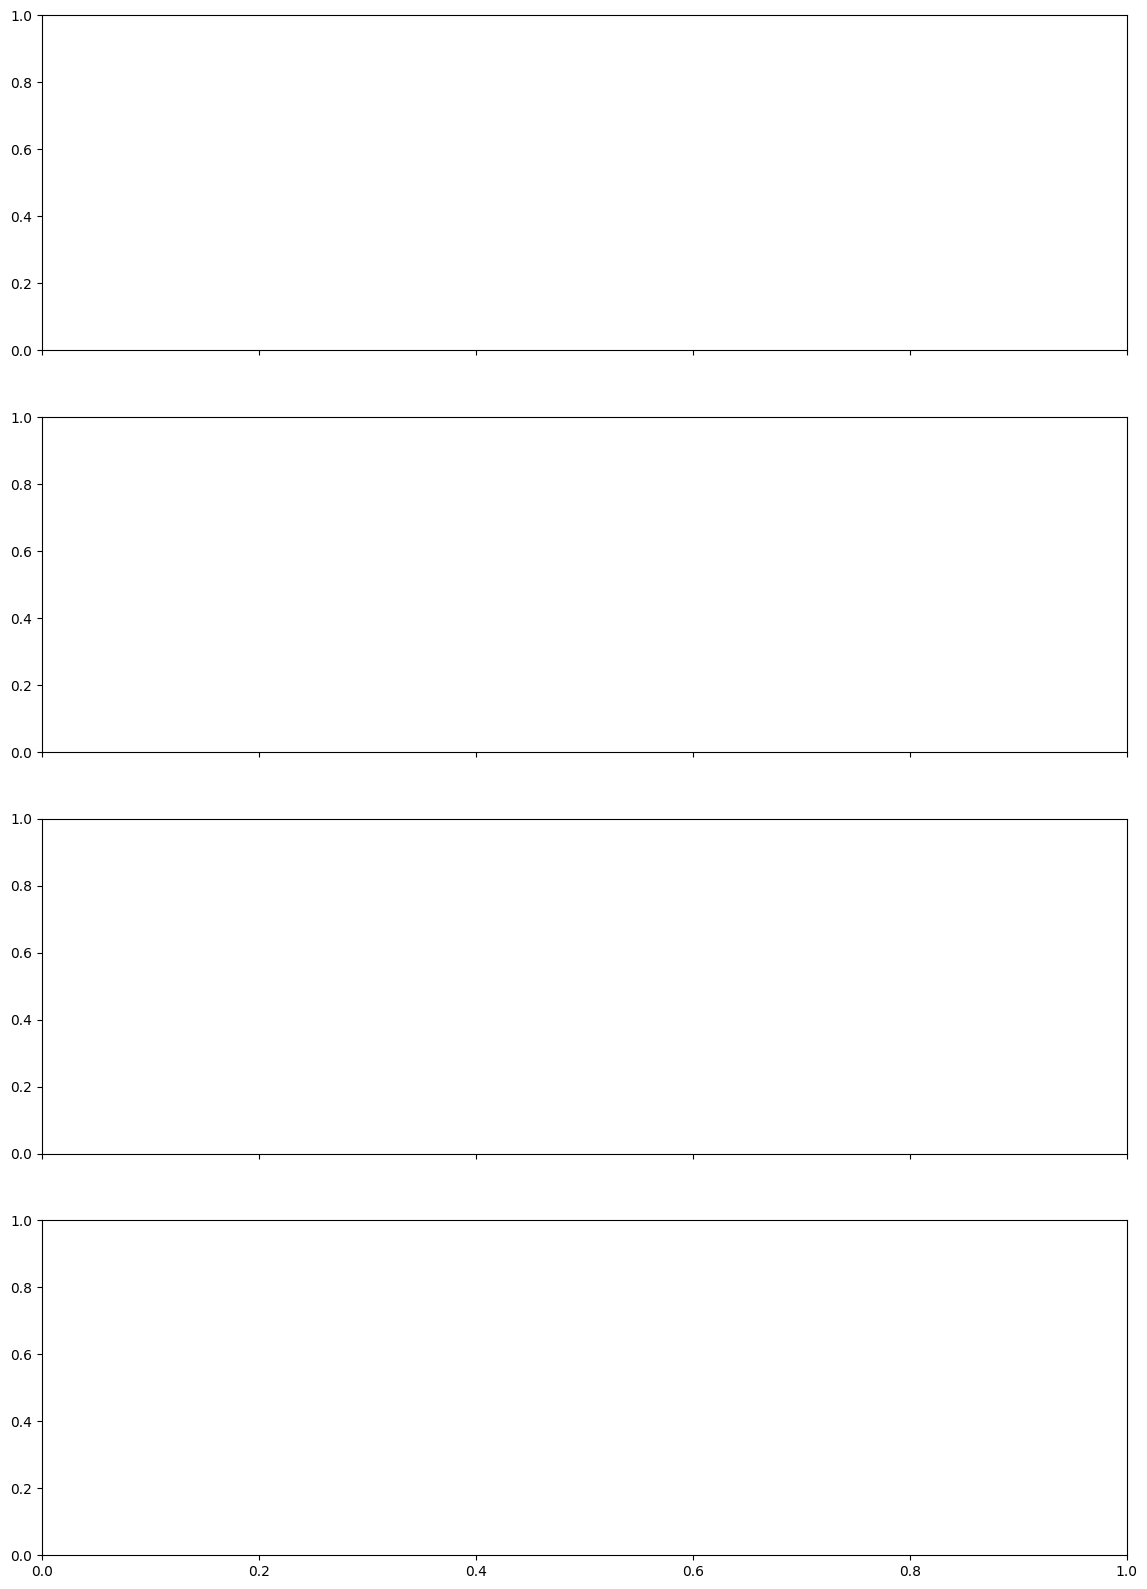

In [17]:
import pandas as pd

# Example: Load the monthly averaged data for both station and PAS
# Assuming the dataframes `station_monthly_df` and `pas_monthly_df` are already available
# They should have a datetime index and columns for the measurements (e.g., PM2.5, PM10)

for location, details in metadata.items():

    site_id = details["AQMS"]["site_id"]
    start_date = details["AQMS"]["data_range"][0]
    end_date = details["AQMS"]["data_range"][1]
    # Reformat start_date and end_date
    start_date_formatted = datetime.strptime(start_date, "%Y-%m-%d").strftime("%Y%m%d")
    end_date_formatted = datetime.strptime(end_date, "%Y-%m-%d").strftime("%Y%m%d")

    station_monthly_df = pd.read_csv(
        f"../data/raw/colocation/{location}/AQMS/{start_date_formatted}_{end_date_formatted}/aqms_{site_id}_{start_date_formatted}_{end_date_formatted}_monthly.csv",
        parse_dates=["datetime_utc"],
        index_col="datetime_utc",
    )

    sensors = details.get("PAS", {})
    pas_monthly_df = None
    for sensor_id, sensor_details in sensors.items():
        pas_monthly_df = pd.read_csv(
            f"../data/raw/colocation/{location}/PAS/{sensor_id}/{start_date_formatted}_{end_date_formatted}/pas_{sensor_id}_{start_date_formatted}_{end_date_formatted}.csv",
            parse_dates=["datetime_utc"],
            index_col="datetime_utc",
        )

    # Convert the datetime index to a column for plotting
    station_monthly_df.reset_index(inplace=True)
    pas_monthly_df.reset_index(inplace=True)

    # Add a source column to differentiate the data
    station_monthly_df["Source"] = "Station"
    pas_monthly_df["Source"] = "PAS"

    # Combine the dataframes
    combined_df = pd.concat([station_monthly_df, pas_monthly_df])
    print("combined_df", combined_df)
    # List of measurements to plot
    measurements = ['PM2.5', 'PM10', 'TEMP', 'HUMID']

    # Create a subplot for each measurement
    fig, axes = plt.subplots(len(measurements), 1, figsize=(14, 20), sharex=True)

    for i, measurement in enumerate(measurements):
        sns.boxplot(x=combined_df['datetime_utc'].dt.strftime('%Y-%m'), y=measurement, hue='Source', data=combined_df, ax=axes[i])
        axes[i].set_xlabel('')
        axes[i].set_ylabel(measurement)
        axes[i].set_title(f'Monthly {measurement} Concentration: Station vs PAS')
        axes[i].legend(title='Source')

    plt.xticks(rotation=45)
    plt.xlabel('Month')
    plt.tight_layout()
    plt.show()